# **1. Importing the required libraries for EDA**


In [5]:
import pandas as pd 
import numpy as np
import sympy as sp
import seaborn as sns              #visualisation 
import matplotlib.pyplot as plt    #visualisation
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [6]:
import io
!pip install -q xlrd 
#data=pd.read_excel(io.bytesIO(uploaded['Bank_personal_loan _modelling.xlsx']))
data=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [7]:
data.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [8]:
data.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


# **2.Checking the types of data and basic summary stats**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
data.median()


ID                     2500.5
Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64

In [ ]:
data.mean()

ID                     2500.500000
Age                      45.338400
Experience               20.104600
Income                   73.774200
ZIP Code              93152.503000
Family                    2.396400
CCAvg                     1.937938
Education                 1.881000
Mortgage                 56.498800
Personal Loan             0.096000
Securities Account        0.104400
CD Account                0.060400
Online                    0.596800
CreditCard                0.294000
dtype: float64

# **2.1 Cleaning of Data**

In [17]:
data['Experience'].replace( to_replace= -1,value = np.nan,inplace = True )
data['Experience'].replace( to_replace= -2,value = np.nan,inplace = True )
data['Experience'].replace( to_replace= -3,value = np.nan,inplace = True )
data['Experience'].fillna(data['Experience'].median(),inplace=True)

# **2.2 Outliers**

Outliers need to be detect and removed for example in the set of nos 33, 34 ,35 , 37 ,15 . here 15 is an outlier and need to be remmoved.

The process of identifying outliers has many names in data mining and machine learning such as outlier mining, outlier modeling and novelty detection and anomaly detection.

# **3.EDA: Study the data distribution in each attribute and target variable, share your finding.**


## ● Number of unique in each column?



In [ ]:
list = []
for col in data.columns:
 list.append([col,data[col].nunique() ,data[col].sample(10).drop_duplicates().values])

In [ ]:
df_Unique=pd.DataFrame(data=list , columns=['Features','Unique','Uniquesample'])
df_Unique

,Features,Unique,Uniquesample
0,Age,45,"[0.25, 0.5681818181818181, 0.40909090909090917..."
1,Experience,47,"[19, 7, 11, 30, 12, 6, 42, 17, 21]"
2,Income,162,"[0.1111111111111111, 0.40277777777777773, 0.03..."
3,Family,4,"[0.0, 0.6666666666666667, 1.0, 0.3333333333333..."
4,CCAvg,108,"[0.18000000000000002, 0.13999999999999999, 0.1..."
5,Education,3,"[0.5, 0.0, 1.0]"
6,Mortgage,347,"[0.0, 0.2503937007874016, 0.32755905511811023]"
7,Personal Loan,2,"[0, 1]"
8,Securities Account,2,"[0, 1]"
9,CD Account,2,"[0, 1]"


## ● Number of people with zero mortgage? 

In [ ]:
print('Number of people with zero mortgage:',len(data[data['Mortgage']==0]))

Number of people with zero mortgage: 3462


## ● Number of people with zero credit card spending per month?




In [ ]:
print('Number of people with zero Credit Card spending per month:', len(data[data['CCAvg']==0]))

Number of people with zero Credit Card spending per month: 106


## ● Value counts of all categorical columns. 


In [ ]:
categorical_columns = ['Family' ,'Education' , 'CCAvg' , 'Personal Loan' , 'CreditCard'  , 'CD Account' , 'Online'  , 'Securities Account']

for column in categorical_columns:
    print(f'Value counts for {column} column:')
    print(data[column].value_counts())
    print()

Value counts for Family column:
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

Value counts for Education column:
1    2096
3    1501
2    1403
Name: Education, dtype: int64

Value counts for CCAvg column:
0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.20      1
9.30      1
3.67      1
5.33      1
Name: CCAvg, Length: 108, dtype: int64

Value counts for Personal Loan column:
0    4520
1     480
Name: Personal Loan, dtype: int64

Value counts for CreditCard column:
0    3530
1    1470
Name: CreditCard, dtype: int64

Value counts for CD Account column:
0    4698
1     302
Name: CD Account, dtype: int64

Value counts for Online column:
1    2984
0    2016
Name: Online, dtype: int64

Value counts for Securities Account column:
0    4478
1     522
Name: Securities Account, dtype: int64



# ● **Univariate and Bivariate analysis**

---



## ● Univariate

Here we are using both line graph and histogram for comapring to variable throughout.

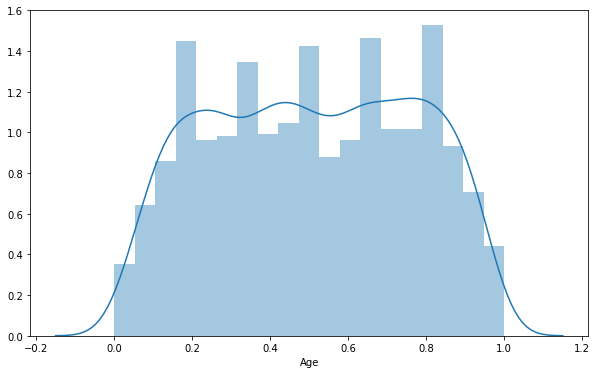

In [ ]:
sns.distplot(data.Age)
                   

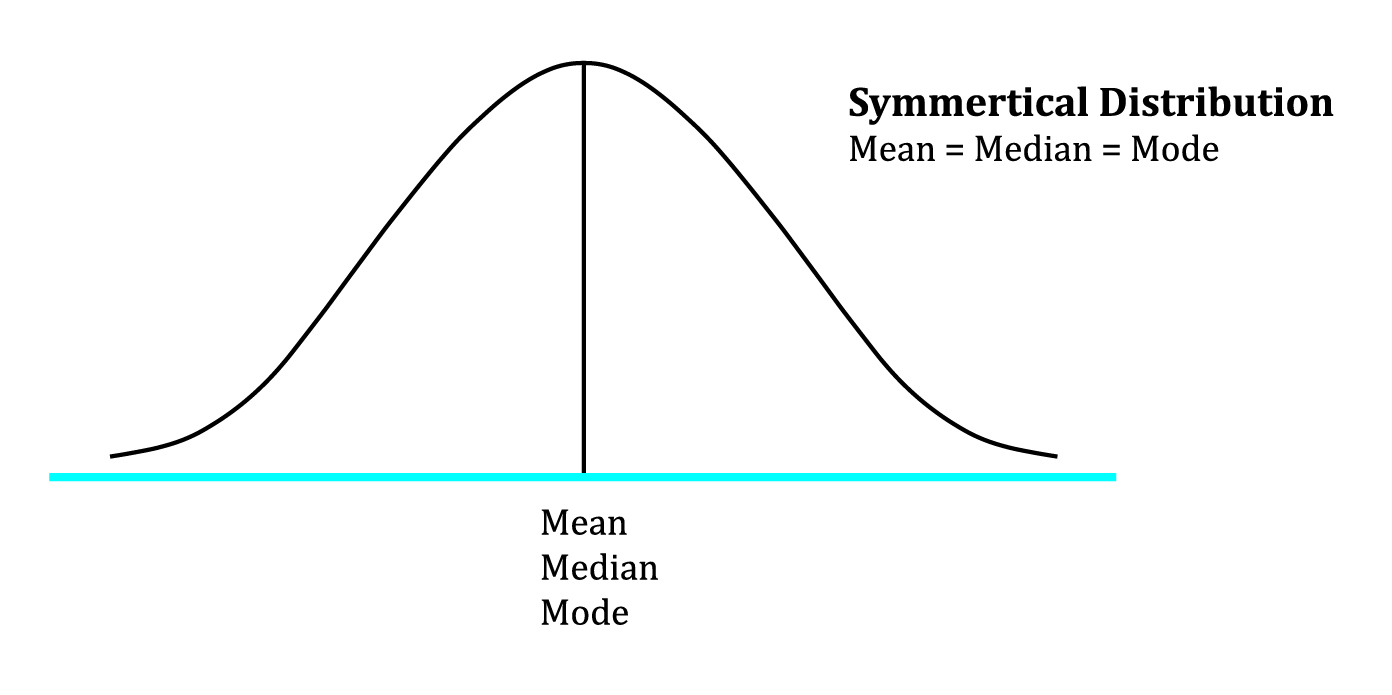**`The graph of age has symmetric distribution.`**

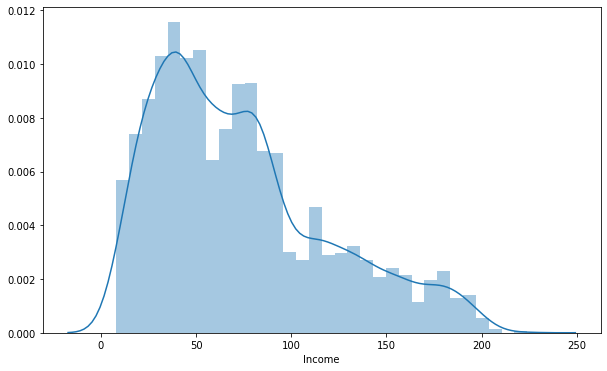

In [ ]:
sns.distplot(data.Income)

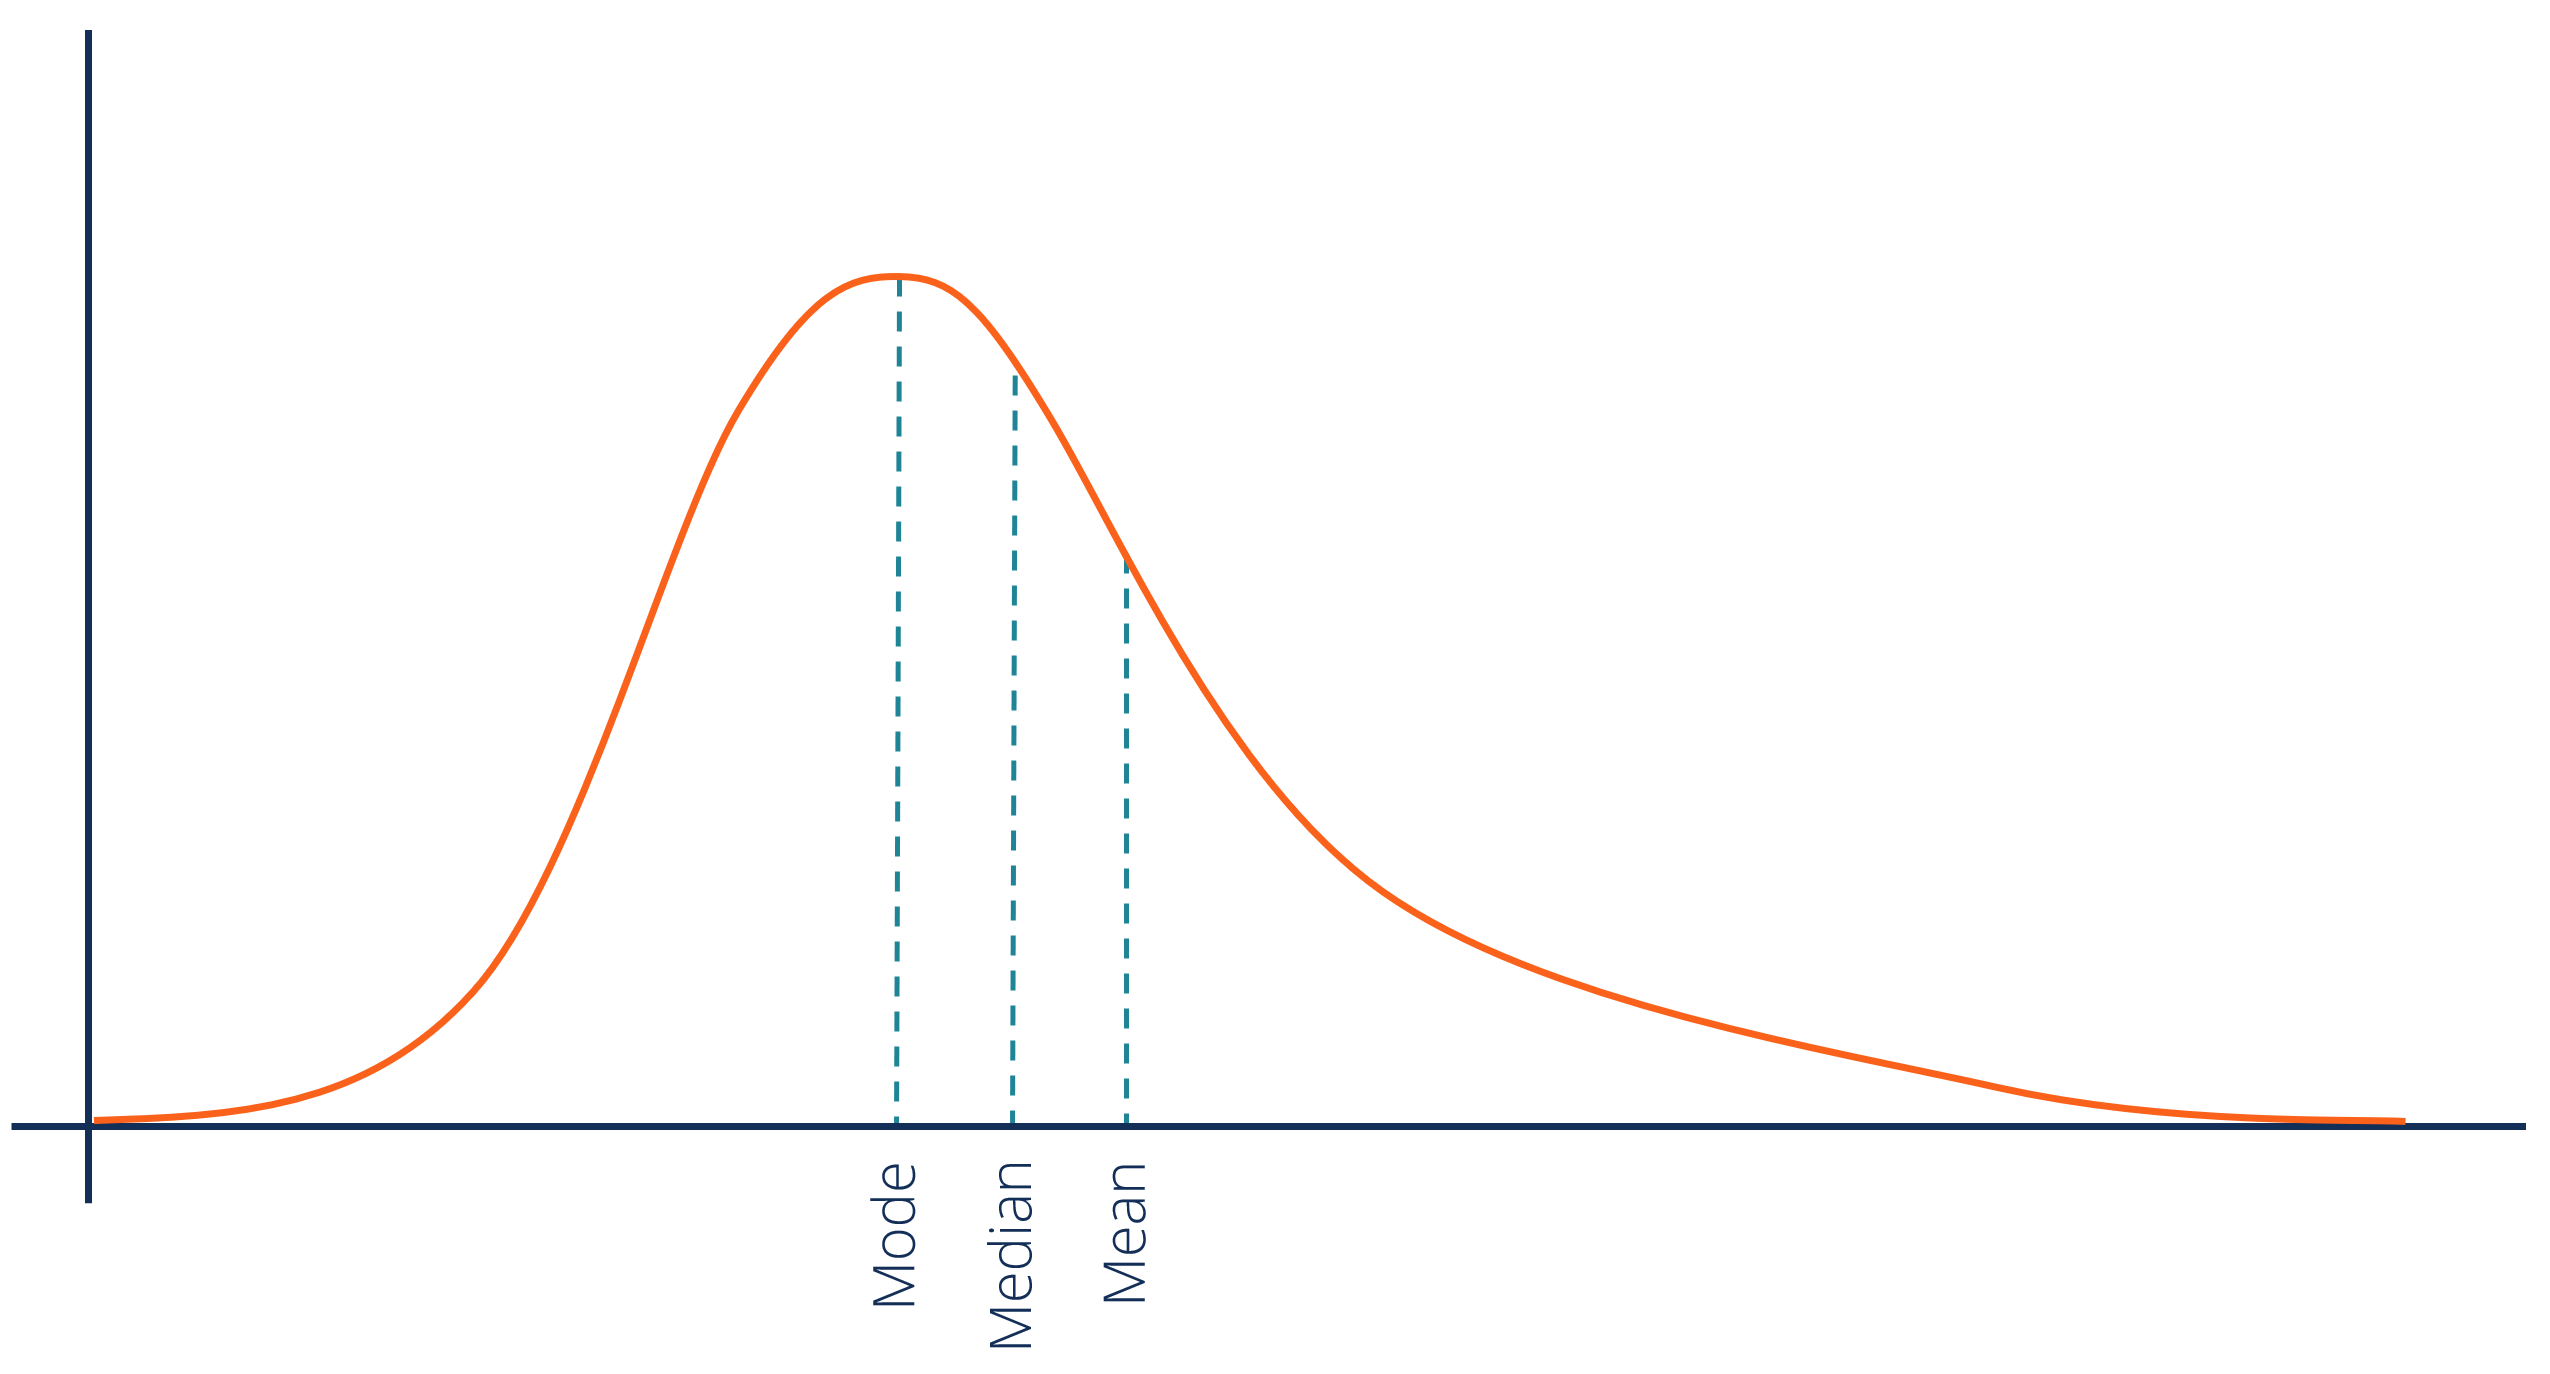**The graph of income has positive skewed distribution.**

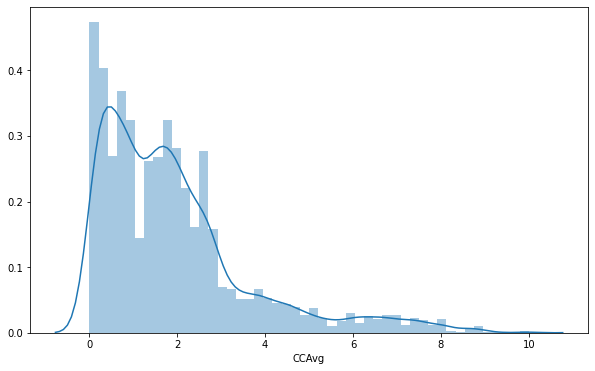

In [ ]:
sns.distplot(data.CCAvg)   

***The graph of CCAvg is positive skewed. ***

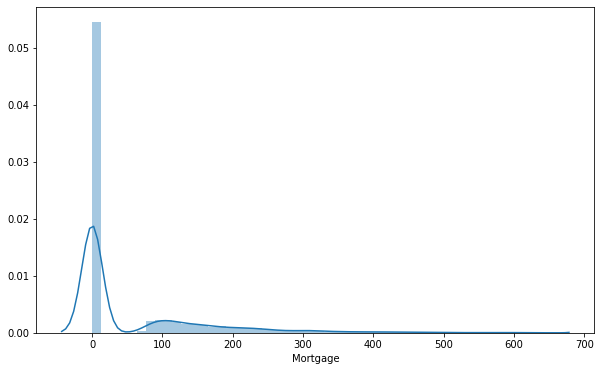

In [ ]:
sns.distplot(data.Mortgage)

The graph for Mortgage is positive skewed.

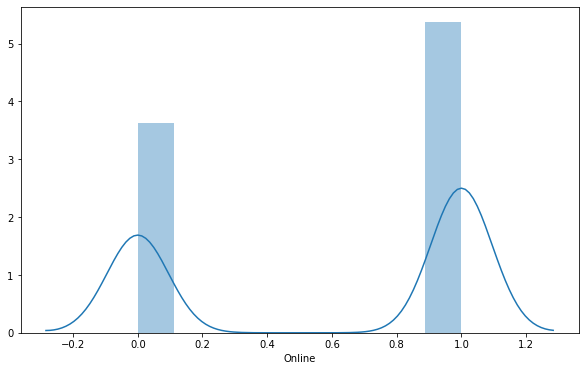

In [ ]:
sns.distplot(data.Online)

In this graph both histogram has different values left histogram is negative skewed but the right one is positive skewed.

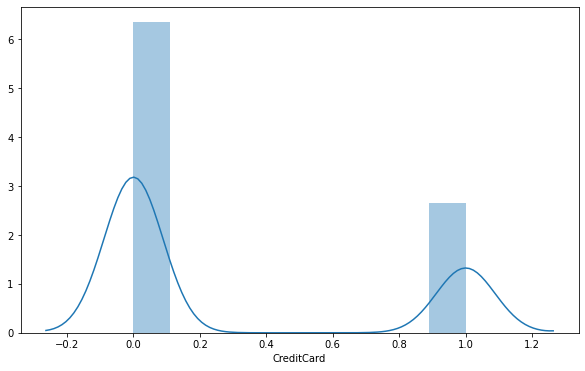

In [ ]:
sns.distplot(data.CreditCard)

In this credit card graph the histogram is negative skewed and in right histogram which is left skewed.

In [11]:
on = data[data['Online'] == 1]['Personal Loan'].value_counts()

# **● Splitting the dataset into training set and test set using stratified sampling**

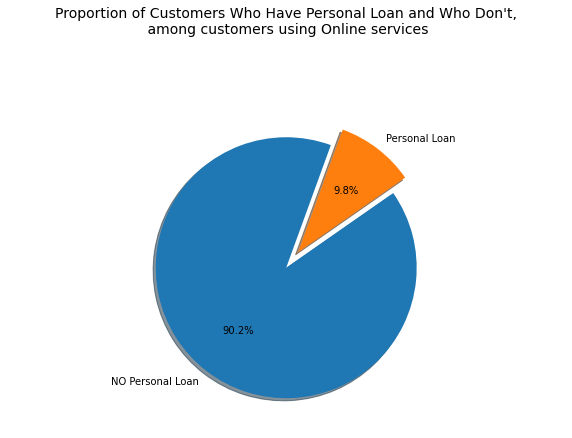

<Figure size 216x216 with 0 Axes>

In [ ]:
plt.axis('equal')
plt.title('Customers Who Have Personal Loan and Who Don\'t,\n among customers using Online services', \
          fontsize = 14, y = 1.2)
labels = ['NO Personal Loan','Personal Loan']
plt.pie(on, labels = labels,autopct= '%1.1f%%', shadow = True,explode = (0, 0.15), startangle = 70)
plt.figure(figsize=(3,3))
plt.show()

Above pie graph shows % of person having personal loan and no personal loan here we can see that majority (90.2%) is with no personal loan.

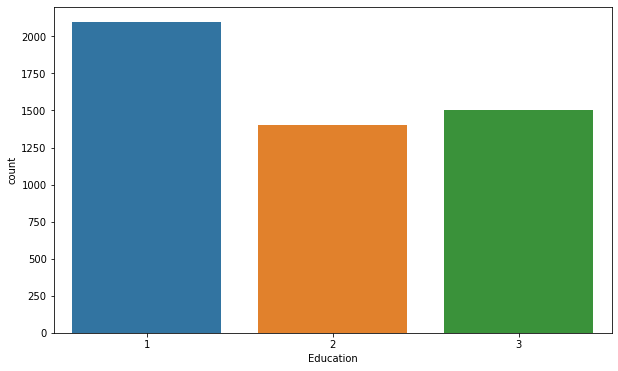

In [ ]:
sns.countplot(data.Education)

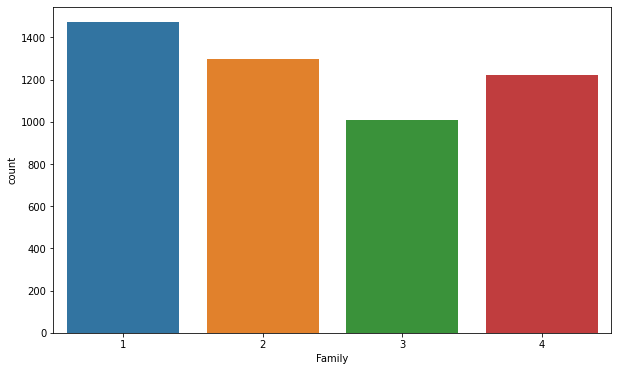

In [ ]:
sns.countplot(data.Family)

(array([3462.,  566.,  428.,  254.,  127.,   73.,   46.,   20.,   14.,
          10.]),
 array([  0. ,  63.5, 127. , 190.5, 254. , 317.5, 381. , 444.5, 508. ,
        571.5, 635. ]),
 <a list of 10 Patch objects>)

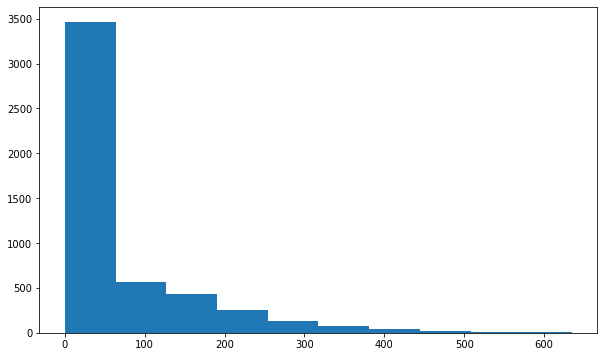

In [ ]:
plt.hist(data.Mortgage)

#● Bivariate

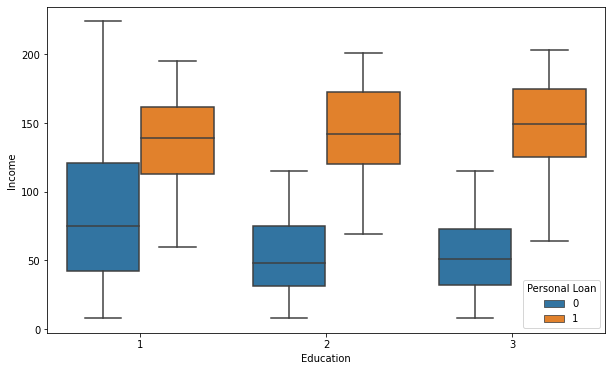

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data)

Text(0.5, 1.2, 'The graph between the count\n and securities Account')

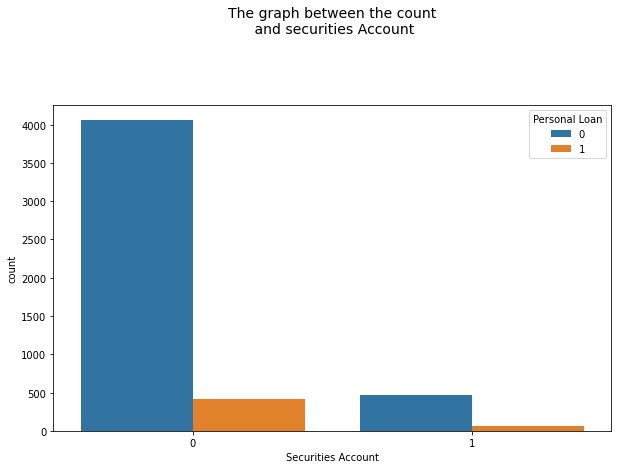

In [ ]:
sns.countplot(x="Securities Account", data=data,hue="Personal Loan")
plt.title('The graph between the count\n and securities Account', 
          fontsize = 14, y = 1.2)

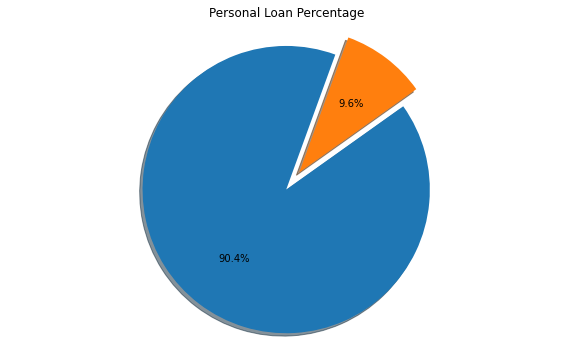

In [ ]:
Data=pd.DataFrame(data['Personal Loan'].value_counts()).reset_index()
Data.columns=['Labels','Personal Loan']
fig1,ax1=plt.subplots(figsize=(10,6))
explode=(0,0.15)
ax1.pie(Data['Personal Loan'],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis('equal')
plt.title('Personal Loan Percentage')
plt.show()

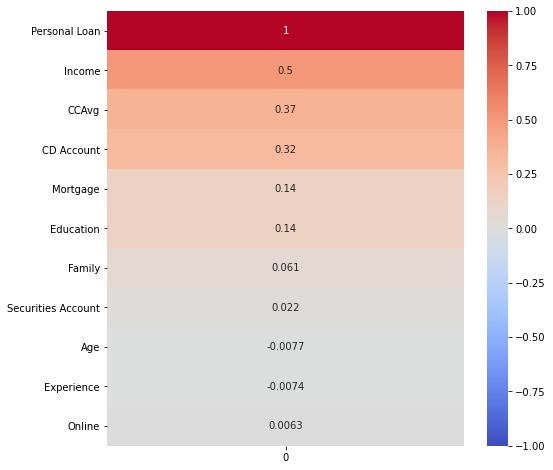

In [ ]:
corr = data.corrwith(data['Personal Loan']).iloc[:-1].to_frame()
corr['abs'] = corr[0].abs()
sorted_corr = corr.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(sorted_corr.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

# **4. Apply necessary transformations for the feature variables**

In [ ]:
data.drop(['ID','ZIP Code'], axis=1, inplace=True)

### We don't need id and zipcode so we are dropping them

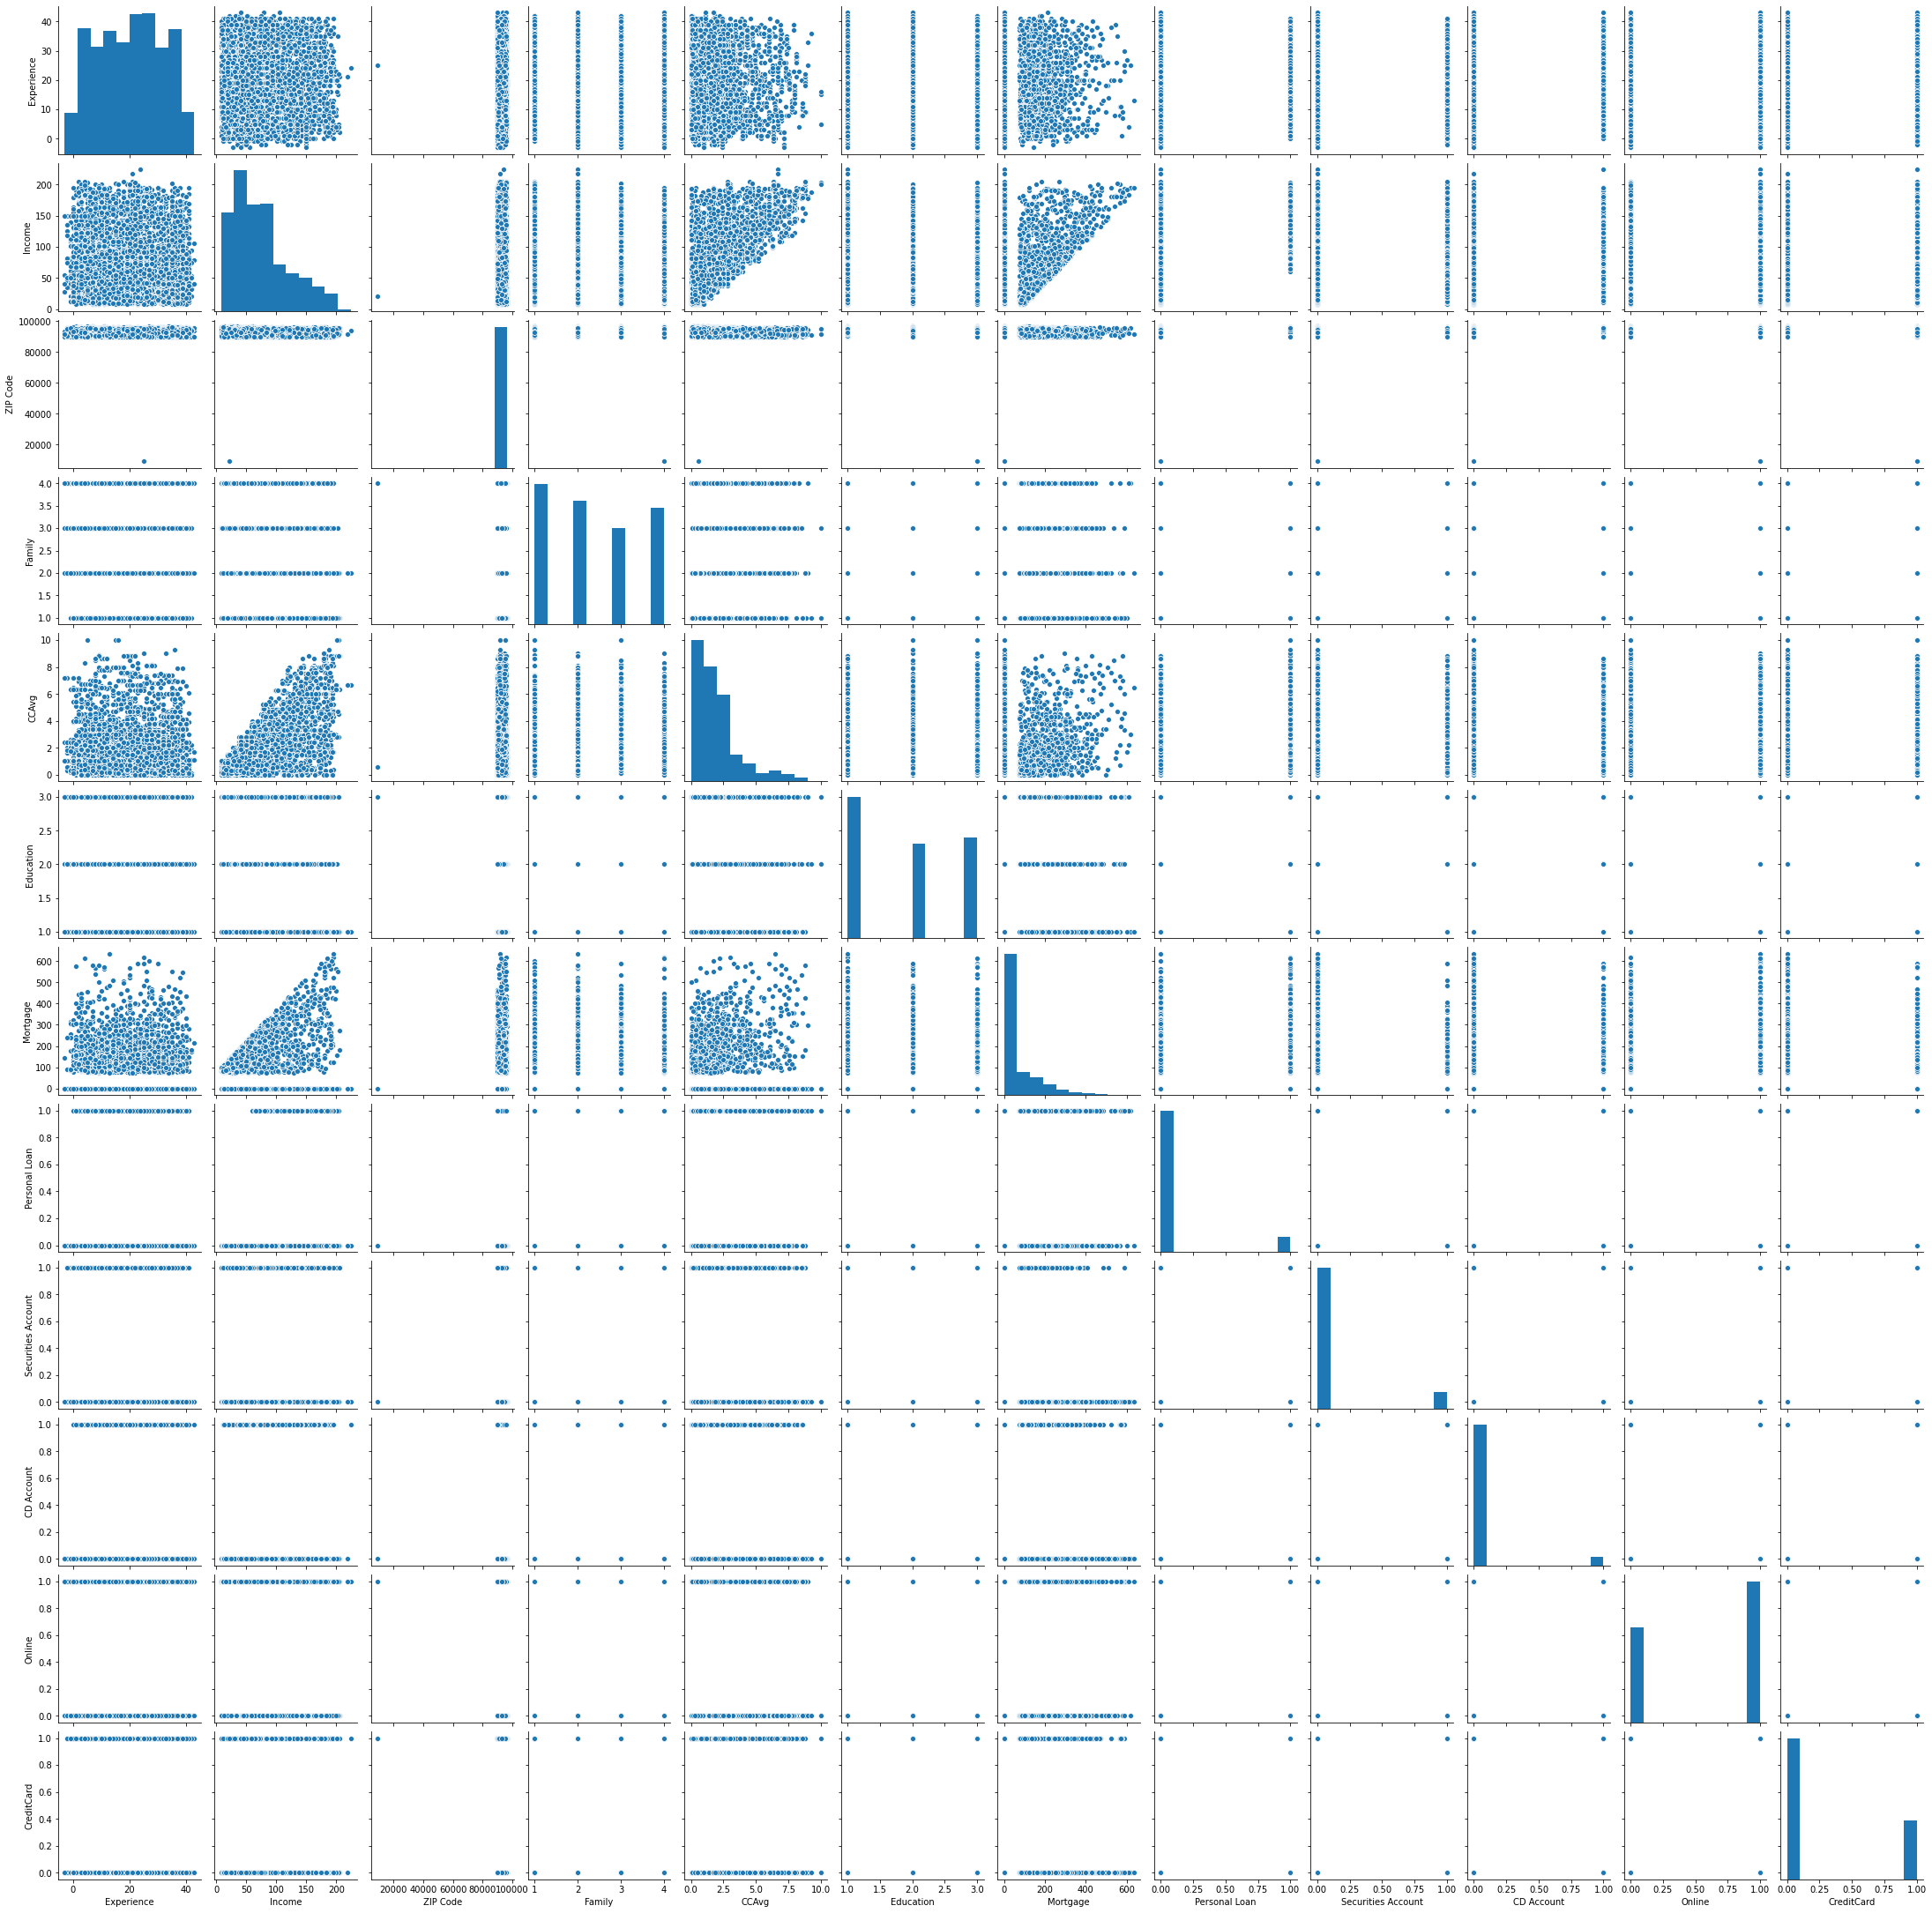

In [ ]:
sns.pairplot(data.iloc[:,2:])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, plot_confusion_matrix, plot_roc_curve,roc_auc_score, accuracy_score
from sklearn.metrics import plot_precision_recall_curve

In [ ]:
columns_to_scale = ['Family','Age','Income','Education','CCAvg','Mortgage']

for column in columns_to_scale:
    scaler = MinMaxScaler()
    data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1))
    0
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,0.045455,1,0.189815,91107,1.000000,0.16,0.0,0.0,0,1,0,0,0
1,2,0.500000,19,0.120370,90089,0.666667,0.15,0.0,0.0,0,1,0,0,0
2,3,0.363636,15,0.013889,94720,0.000000,0.10,0.0,0.0,0,0,0,0,0
3,4,0.272727,9,0.425926,94112,0.000000,0.27,0.5,0.0,0,0,0,0,0
4,5,0.272727,8,0.171296,91330,1.000000,0.10,0.5,0.0,0,0,0,0,1


In [ ]:
X = data.drop(['Personal Loan'], axis=1)
y = data['Personal Loan'].values

X.shape , y.shape

((5000, 13), (5000,))

# **5. Normalise your data and split the data into training and test set in the ratio of 70:30 respectively.**





In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y,random_state=17)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 13), (1500, 13), (3500,), (1500,))

In [ ]:
class_names = ['wont take loan', 'take loan']

# **Normalising the data**

In [ ]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()

#To transform training data
X_train=sc_X.fit_transform(X_train)
#To transform test data
X_test=sc_X.fit_transform(X_test)

# **6. Use the Logistic Regression model to predict the likelihood of a customer buying personal loans.**

# **7. Print all the metrics related for evaluating the model performance**

# **Superwise learning**

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
log_reg = LogisticRegression(C=1.0, max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import plot_precision_recall_curve

Logistic Regression Results: 
Training Accuracy: 0.95
Testing Accuracy: 0.95
Precision: 0.8
Recall: 0.64


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

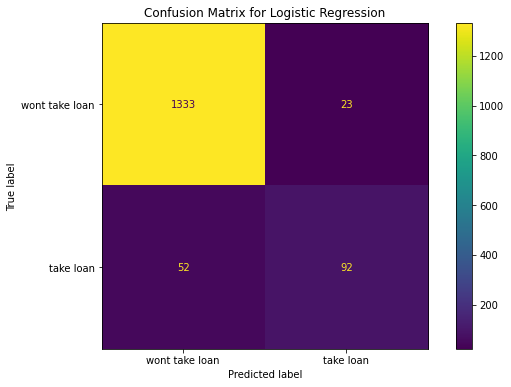

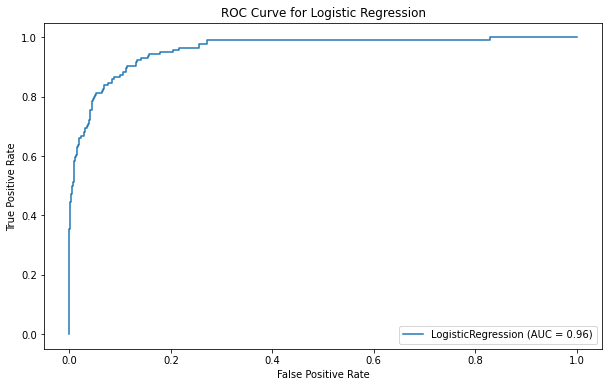

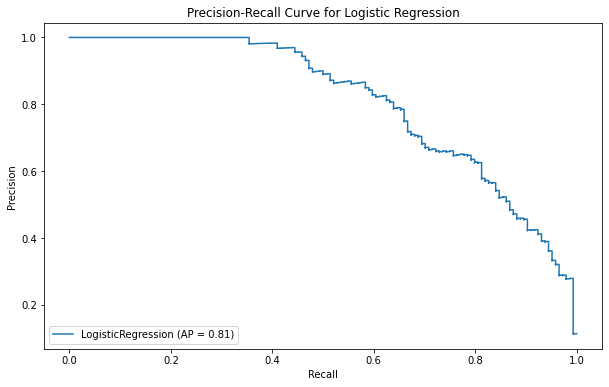

In [ ]:
print('Logistic Regression Results: ')

train_score = log_reg.score(X_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = log_reg.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_pred_logi = log_reg.predict(X_test)

precision_logi = precision_score(y_test, y_pred_logi, labels=class_names).round(2)
print('Precision:', precision_logi)
recall_logi = recall_score(y_test, y_pred_logi).round(2)
print('Recall:', recall_logi)

plot_confusion_matrix(log_reg, X_test, y_test, display_labels=class_names,values_format='d' )
plt.title('Confusion Matrix for Logistic Regression')

plot_roc_curve(log_reg, X_test, y_test)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(log_reg, X_test, y_test)
plt.title('Precision-Recall Curve for Logistic Regression')


In [ ]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1356
           1       0.92      0.85      0.88       144

    accuracy                           0.98      1500
   macro avg       0.95      0.92      0.94      1500
weighted avg       0.98      0.98      0.98      1500



## Model building by Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [ ]:
#feature Scaling
classifier= DecisionTreeClassifier(random_state=0, max_depth=8)
classifier.fit(X_train,y_train)

#predicting on training and test data
y_train_pred = classifier.predict(X_train)
y_test_pred= classifier.predict(X_test)

In [ ]:
pred_test = classifier.predict(X_test)
pred_train = classifier.predict(X_train)

In [ ]:
print('Accuracy on training data :',accuracy_score(y_train,y_train_pred))
print('Accuracy on test data :',accuracy_score(y_test,y_test_pred))


Accuracy on training data : 0.998
Accuracy on test data : 0.9786666666666667


In [ ]:
cm = metrics.confusion_matrix(y_test,pred_test)
print(cm)

[[1345   11]
 [  21  123]]


In [ ]:
acc_Xtest= accuracy_score(y_test,pred_test)
acc_Xtrain= accuracy_score(y_train,pred_train)
print('Accuracy on the X_test is : {:.4f}' .format(acc_Xtest))
print('Accuracy on the X_train is : {:.4f}' .format(acc_Xtrain))

Accuracy on the X_test is : 0.9787
Accuracy on the X_train is : 0.9980


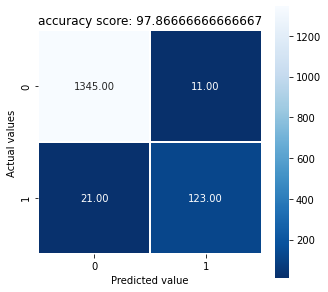

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='.2f',linewidth=0.5,square=True,cmap='Blues_r')
plt.xlabel('Predicted value')
plt.ylabel('Actual values')
all_sampl_title= 'accuracy score: {0}' .format(acc_Xtest*100)
plt.title(all_sampl_title);

In [ ]:
print('Recall: ',recall_score(y_test,pred_test))
print('Precision: ',precision_score(y_test,pred_test))
print('F1 Score: ',f1_score(y_test,pred_test))
print('ROC_AUC Score: ',roc_auc_score(y_test,pred_test))

Recall:  0.9027777777777778
Precision:  0.9027777777777778
F1 Score:  0.9027777777777778
ROC_AUC Score:  0.9462266470009832


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1356
           1       0.91      0.53      0.67       144

    accuracy                           0.95      1500
   macro avg       0.93      0.76      0.82      1500
weighted avg       0.95      0.95      0.94      1500



## Model building by Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=7,n_jobs=-1 )
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Random Forest Classifier Results: 
Training Accuracy: 0.99
Testing Accuracy: 0.98
Precision: 0.98
Recall: 0.8


Text(0.5, 1.0, 'Precision-Recall Random Forest Classifier')

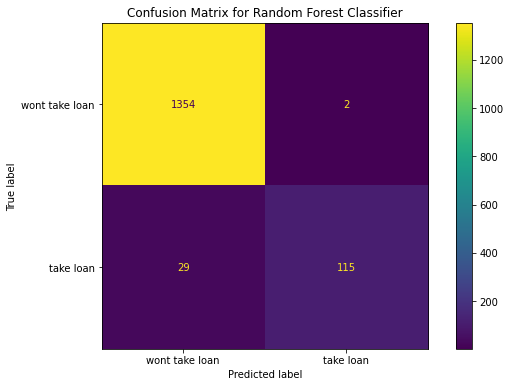

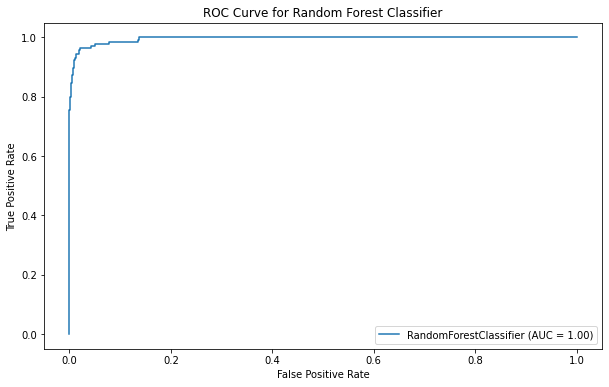

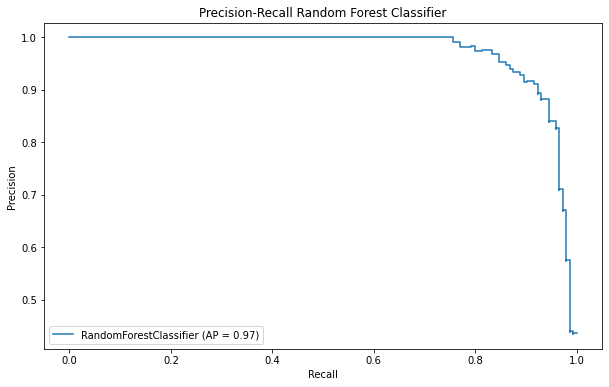

In [ ]:
print('Random Forest Classifier Results: ')

train_score = rf_clf.score(X_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = rf_clf.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_pred_rf = rf_clf.predict(X_test)

precision_rf = precision_score(y_test, y_pred_rf, labels=class_names).round(2)
print('Precision:', precision_rf)
recall_rf = recall_score(y_test, y_pred_rf).round(2)
print('Recall:', recall_rf)

plot_confusion_matrix(rf_clf, X_test, y_test, display_labels=class_names,values_format='d')
plt.title('Confusion Matrix for Random Forest Classifier')

plot_roc_curve(rf_clf, X_test, y_test)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(rf_clf, X_test, y_test)
plt.title('Precision-Recall Random Forest Classifier')

In [ ]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1356
           1       0.92      0.85      0.88       144

    accuracy                           0.98      1500
   macro avg       0.95      0.92      0.94      1500
weighted avg       0.98      0.98      0.98      1500



# **8. Build various other classification algorithms and compare their performance**

## Model Building by Support Vector Machine (SVM)





In [ ]:
from sklearn import svm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
sv= svm.SVC(kernel='linear',C=1)
sv.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred_test = sv.predict(X_test)
pred_train = sv.predict(X_train)

In [ ]:
acc_Xtest= accuracy_score(y_test,pred_test)
acc_Xtrain= accuracy_score(y_train,pred_train)
print('Accuracy on the X_test is : {:.4f}' .format(acc_Xtest))
print('Accuracy on the X_train is : {:.4f}' .format(acc_Xtrain))

Accuracy on the X_test is : 0.9500
Accuracy on the X_train is : 0.9517


In [ ]:
cm = metrics.confusion_matrix(y_test,pred_test)
print(cm)

[[1348    8]
 [  67   77]]


In [ ]:
ax = plt.subplots(figsize=(16,8))

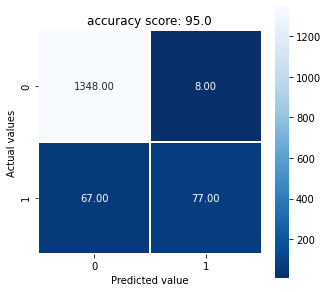

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='.2f',linewidth=0.5,square=True,cmap='Blues_r')
plt.xlabel('Predicted value')
plt.ylabel('Actual values')[]
all_sampl_title= 'accuracy score: {0}' .format(acc_Xtest*100)
plt.title(all_sampl_title);

In [ ]:
print('Recall: ',recall_score(y_test,pred_test))
print('Precision: ',precision_score(y_test,pred_test))
print('F1 Score: ',f1_score(y_test,pred_test))
print('ROC_AUC Score: ',roc_auc_score(y_test,pred_test))


Recall:  0.5347222222222222
Precision:  0.9058823529411765
F1 Score:  0.6724890829694323
ROC_AUC Score:  0.7644112586037365


In [ ]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1356
           1       0.91      0.53      0.67       144

    accuracy                           0.95      1500
   macro avg       0.93      0.76      0.82      1500
weighted avg       0.95      0.95      0.94      1500



#  Business understanding of your model and comparision between models



# Objective:
  
   The classification goal is to predict the likelihood of a liability customer buying personal loans. 


#	Python libraries:
 
 •	Numpy

 •  Sympy

 •	Pandas

 •	Matplotlib

 •	Seaborn

 •  Scikit

# Problem Statement:

We have to build a model that will help to identify the
potential customers who have a higher probability of purchasing the loan from the bank. 
This will increase the success ratio while at the same time reduce the cost of the campaign.
Here there are four model building which has done their prediction for loan seeking buyers.

# Classification Algorithm used:

* Logistic Regression  
* Decision Tree
* Random forest classifier
* Support vector machine 

 
#     ---------**Random Forest Classifier**---------

* Random Forest Classifier Results: 
* Training Accuracy: 0.99
* Testing Accuracy: 0.99
* Precision: 0.98
* Recall: 0.92

               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1356
           1       0.92      0.85      0.88       144

  *  accuracy       :                       0.98    ||  1500
  * macro avg       :   0.95   ||   0.92   ||   0.94 ||    1500
  * weighted avg    :   0.98    ||  0.98 ||   0.98  ||   1500



#            ---------**Decision Tree**---------

* Accuracy on training data : 0.998
* Accuracy on test data : 0.9786666666666667

                precision    recall  f1-score   support

           0       0.95      0.99      0.97      1356
           1       0.91      0.53      0.67       144

*  accuracy :                           0.95   ||    1500
*  macro avg :      0.93  ||   0.76   ||    0.82    ||   1500
* weighted avg :    0.95    ||   0.95   ||    0.94     ||  1500


#         ---------**Support Vector Machines**---------
          
* Accuracy on the X_test is : 0.9500
* Accuracy on the X_train is : 0.9517      

                 precision    recall  f1-score   support

             0       0.95      0.99      0.97      1356
             1       0.91      0.53      0.67       144

  *  accuracy       :                      0.95  ||    1500
  * macro avg       :  0.93 ||   0.76  ||    0.82  ||    1500
  * weighted avg    :  0.95   ||   0.95 ||     0.94  ||    1500


#         ---------**Logistic Regression**---------

* Training Accuracy: 0.95
* Testing Accuracy: 0.95
 
                 precision    recall  f1-score   support
 
              0       0.98      0.99      0.99      1356
              1       0.92      0.85      0.88       144

  
   *     accuracy                           0.98  ||    1500
   *    macro avg  0.95  ||    0.92  ||     0.94   ||  1500
   * weighted avg    0.98  ||    0.98  ||     0.98 ||  1500



  #  Variables 
    
1.  Independent 
2.  Dependent

# 1. Independent Variable 
  
  1.  ID	       : Customer ID							
  2.  Age	       : Customer's age 					
  3.  Experience : Years of professional experience						
  4.  Income	   : Annual income of the customer 						
  5.  ZIPCode	   : Home Address ZIP code.							
  6.  Family	   : Family size of the customer							
  7.  CCAvg	Avg. : spending on credit cards per month 
  8.  Education	 : Education Level.
                  ●  Undergrad 
                  ●  Graduate 
                  ●  Advanced/Professional							
  9.  Mortgage	 : Value of house mortgage if any							 
  10. Securities Account: Does the customer have a          securities account							
  11. CD Account : Does the customer have a certificate of deposit (CD) account 						 
  12. Online : Does the customer use internet banking facilities?							
  13. CreditCard :Does the customer uses a credit card  

#	2. Dependent Variable

   ● Personal Loan 



#  Conclusion & Personal views. 


* Their are various factors to judge a model that can help the bank for loan seekimg buyers.

* Schematic models provide a pictorial representation of conceptual relationships.

* Diagrams,Charts are examples of a schematic model.

* They help us avoid costly mistakes from which a bank can prevent huge loss in their success rate .

* Accuracy of each model are different from other and the best building model for this by comparing them is "Random forest classifier" with 99.0 % accuracy followed by "Decision Tree" with 97.8 % accuracy , "SVM(Support Vector Machine)" with 95.1 % accuracy and last "Logistic Regression" with 95.0 % accuracy.